In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("../input"))

['interiordesign-dataset']


In [2]:
FAST_RUN = False
epochs= 3 if FAST_RUN else 100
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
batch_size=64
earlystop_patience = 25
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3
folder_path = r'../input/interiordesign-dataset/v5.0/train/'
folder_path_val = r'../input/interiordesign-dataset/v5.0/val/'
LABELS = os.listdir(folder_path)

In [3]:
listfolder = os.listdir(folder_path)
listfolder.sort()
print(listfolder)

['ArtDecor', 'Hitech', 'Indochina', 'Industrial', 'Scandinavian']


In [4]:
categories = []
filenames = []

for folder in listfolder:
    for item in os.listdir(os.path.join(folder_path, folder)):
        label = item[: item.find('_')]
        filenames.append(label + '/' + item)
        categories.append(label)

train_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
print(train_df)

                                 filename      category
0             ArtDecor/ArtDecor_01307.jpg      ArtDecor
1             ArtDecor/ArtDecor_01555.jpg      ArtDecor
2             ArtDecor/ArtDecor_01100.jpg      ArtDecor
3             ArtDecor/ArtDecor_00698.jpg      ArtDecor
4             ArtDecor/ArtDecor_00899.jpg      ArtDecor
...                                   ...           ...
7742  Scandinavian/Scandinavian_01058.jpg  Scandinavian
7743  Scandinavian/Scandinavian_00438.jpg  Scandinavian
7744  Scandinavian/Scandinavian_00684.jpg  Scandinavian
7745  Scandinavian/Scandinavian_00671.jpg  Scandinavian
7746  Scandinavian/Scandinavian_01434.jpg  Scandinavian

[7747 rows x 2 columns]


In [5]:
train_df.head()

,filename,category
0,ArtDecor/ArtDecor_01307.jpg,ArtDecor
1,ArtDecor/ArtDecor_01555.jpg,ArtDecor
2,ArtDecor/ArtDecor_01100.jpg,ArtDecor
3,ArtDecor/ArtDecor_00698.jpg,ArtDecor
4,ArtDecor/ArtDecor_00899.jpg,ArtDecor


In [6]:
train_df.tail()

,filename,category
7742,Scandinavian/Scandinavian_01058.jpg,Scandinavian
7743,Scandinavian/Scandinavian_00438.jpg,Scandinavian
7744,Scandinavian/Scandinavian_00684.jpg,Scandinavian
7745,Scandinavian/Scandinavian_00671.jpg,Scandinavian
7746,Scandinavian/Scandinavian_01434.jpg,Scandinavian


<AxesSubplot:>

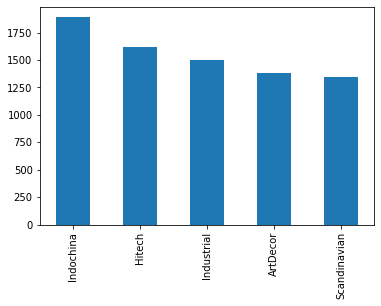

In [7]:
train_df['category'].value_counts().plot.bar()

In [8]:
categories = []
filenames = []

for folder in listfolder:
    for item in os.listdir(os.path.join(folder_path_val, folder)):
        label = item[: item.find('_')]
        filenames.append(label + '/' + item)
        categories.append(label)

validate_df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(validate_df)

                                 filename      category
0             ArtDecor/ArtDecor_00318.jpg      ArtDecor
1             ArtDecor/ArtDecor_01178.jpg      ArtDecor
2             ArtDecor/ArtDecor_00063.jpg      ArtDecor
3             ArtDecor/ArtDecor_00008.jpg      ArtDecor
4             ArtDecor/ArtDecor_01431.jpg      ArtDecor
...                                   ...           ...
1925  Scandinavian/Scandinavian_00715.jpg  Scandinavian
1926  Scandinavian/Scandinavian_00341.jpg  Scandinavian
1927  Scandinavian/Scandinavian_01256.jpg  Scandinavian
1928  Scandinavian/Scandinavian_00014.jpg  Scandinavian
1929  Scandinavian/Scandinavian_00660.jpg  Scandinavian

[1930 rows x 2 columns]


In [9]:
validate_df.head()

,filename,category
0,ArtDecor/ArtDecor_00318.jpg,ArtDecor
1,ArtDecor/ArtDecor_01178.jpg,ArtDecor
2,ArtDecor/ArtDecor_00063.jpg,ArtDecor
3,ArtDecor/ArtDecor_00008.jpg,ArtDecor
4,ArtDecor/ArtDecor_01431.jpg,ArtDecor


In [10]:
validate_df.tail()

,filename,category
1925,Scandinavian/Scandinavian_00715.jpg,Scandinavian
1926,Scandinavian/Scandinavian_00341.jpg,Scandinavian
1927,Scandinavian/Scandinavian_01256.jpg,Scandinavian
1928,Scandinavian/Scandinavian_00014.jpg,Scandinavian
1929,Scandinavian/Scandinavian_00660.jpg,Scandinavian


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x512 at 0x7F31FB696950>


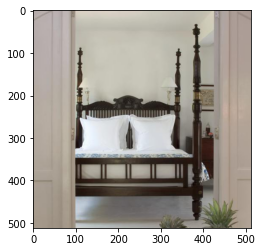

In [11]:
sample = random.choice(filenames)
image = load_img(os.path.join(folder_path_val, sample))
print(image)
plt.imshow(image)

<AxesSubplot:>

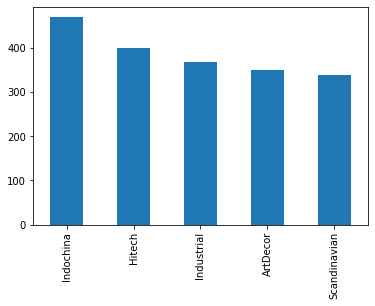

In [12]:
validate_df['category'].value_counts().plot.bar()

In [13]:
import cv2
import os
import re
import h5py
import keras
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D, GlobalMaxPooling2D
from keras.applications import VGG19, ResNet50, NASNetLarge, DenseNet201, VGG16, InceptionResNetV2, Xception, ResNet152, InceptionV3, DenseNet121
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.optimizers import Adam


model = Sequential()
model.add(Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(5,5))
model.add(Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(5,5))
model.add(Flatten())
model.add(Dense(180,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5,activation='softmax'))

model.compile(optimizer = "adam" , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 44, 44, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 40, 40, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 38, 38, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 36, 36, 50)        4

In [14]:
# model_base = DenseNet201(input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
#                          include_top=False, 
#                          weights=None)

# model = Sequential([
#     model_base,
# #     GlobalMaxPooling2D(),
# #     Dense(512, activation='relu'),
# #     Dropout(0.5),
#     MaxPool2D((2,2) , strides = 2),
#     Flatten(),
#     Dense(5 , activation='softmax')])
    
# # optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)

# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# model.summary()

In [15]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(monitor="val_accuracy",
                          patience=earlystop_patience,
                          restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [16]:
# df["category"] = df["category"].replace({0: 'Benign', 1: 'Malignant'}) 

In [17]:
# train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot:>

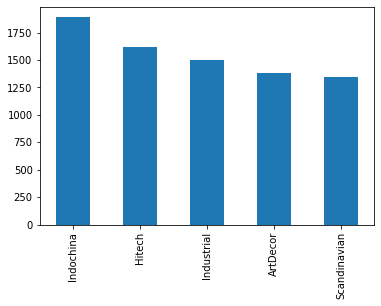

In [18]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

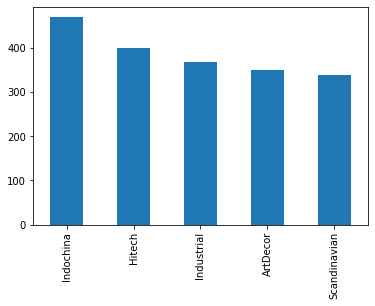

In [19]:
validate_df['category'].value_counts().plot.bar()

In [20]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]


In [21]:
train_datagen = ImageDataGenerator(
    rotation_range=7,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    folder_path, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 7747 validated image filenames belonging to 5 classes.


In [22]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    folder_path_val, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1930 validated image filenames belonging to 5 classes.


In [23]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    folder_path,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


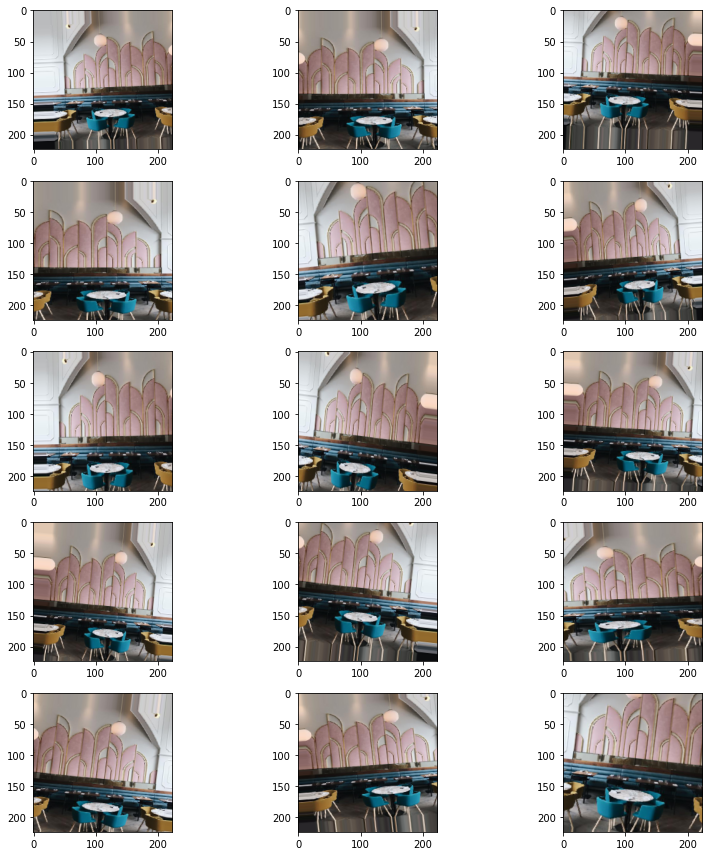

In [24]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [25]:
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
121/121 [==============================] - 235s 2s/step - loss: 1.6089 - accuracy: 0.2211 - val_loss: 1.6030 - val_accuracy: 0.2443
Epoch 2/100
121/121 [==============================] - 165s 1s/step - loss: 1.5759 - accuracy: 0.2572 - val_loss: 1.4272 - val_accuracy: 0.3427
Epoch 3/100
121/121 [==============================] - 166s 1s/step - loss: 1.4242 - accuracy: 0.3754 - val_loss: 1.3658 - val_accuracy: 0.4151
Epoch 4/100
121/121 [==============================] - 166s 1s/step - loss: 1.3307 - accuracy: 0.4216 - val_loss: 1.3153 - val_accuracy: 0.4396
Epoch 5/100
121/121 [==============================] - 166s 1s/step - loss: 1.2497 - accuracy: 0.4869 - val_loss: 1.2116 - val_accuracy: 0.4901
Epoch 6/100
121/121 [==============================] - 164s 1s/step - loss: 1.2327 - accuracy: 0.5065 - val_loss: 1.1555 - val_accuracy: 0.5349
Epoch 7/100
121/121 [==============================] - 166s 1s/step - loss: 1.1821 - accuracy: 0.5227 - val_loss: 1.1426 - val_accuracy:

In [26]:
### save history
import pickle

# In case you want to create a checkpoint
with open('history.pickle', 'wb') as f:
    pickle.dump(history.history, f)
# In case you want to create a checkpoint
with open('history.pickle', 'rb') as f:
    history_ = pickle.load(f)
len(history_)

5

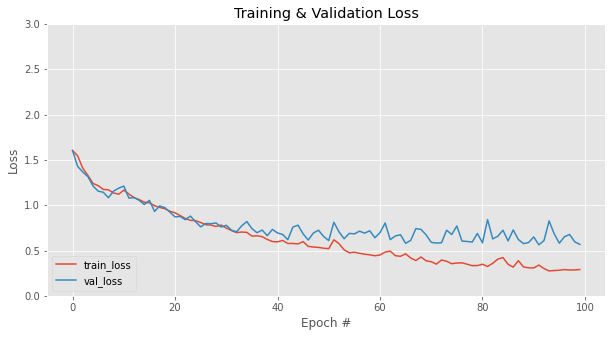

In [27]:
### Plot loss and accuracy train, val
history = history_
epochs_ = len(history["loss"])
plt.style.use("ggplot")
plt.figure(figsize = (10, 5))
plt.plot(np.arange(0, epochs_), history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs_), history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.ylim(0, 3)
plt.show()

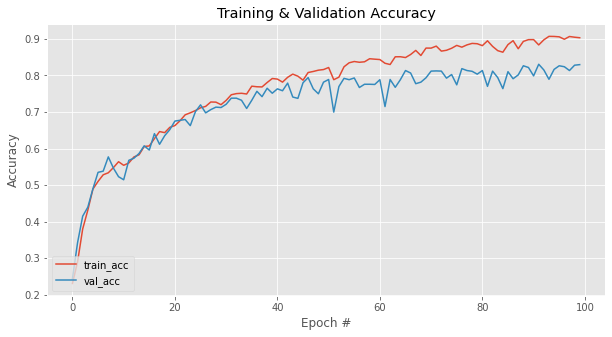

In [28]:
epochs_ = len(history["loss"])
plt.style.use("ggplot")
plt.figure(figsize = (10, 5))
plt.plot(np.arange(0, epochs_), history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs_), history["val_accuracy"], label="val_acc")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

In [29]:
model.save_weights(r'model_v1_weights.h5')
model.save(r'model_v1.h5')

In [30]:
# history_dict = history.history
# print(history_dict.keys())

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
# ax1.plot(history.history['loss'], color='b', label="Training loss")
# ax1.plot(history.history['val_loss'], color='r', label="validation loss")
# ax1.set_xticks(np.arange(1, epochs, 1))
# ax1.set_yticks(np.arange(0, 1, 0.1))

# ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
# ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
# ax2.set_xticks(np.arange(1, epochs, 1))

# legend = plt.legend(loc='best', shadow=True)
# plt.tight_layout()
# plt.show()